In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mkl

np.random.seed(1234)
mkl.set_num_threads(4)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

## Utility functions

In [3]:
def append_ones(matrix, axis=1):
    ones = np.ones((matrix.shape[0], 1), dtype=matrix.dtype)
    return np.concatenate((matrix, ones), axis=axis)

## Feed-forward, activations and tiles

In [4]:
# one layer feed forward
def feed_forward(W, dataset, activation_fun):
    return activation_fun(dataset @ W)
    # raise Exception("Not implemented!")

In [5]:
# sigmoid activation function
def sigmoid(matrix):
    # raise Exception("Not implemented!")
    # return activations
    def sigmoid_function(x):
        return 1.0 / (1.0 + np.exp(-x))

    n = matrix.shape[0]
    m = matrix.shape[1]
    activ = np.empty((n, m), dtype=matrix.dtype)
    for i in range(n):
        activ[i] = sigmoid_function(matrix[i])
    return activ



In [6]:
# arrange 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width)
def tiles(examples, space_between_tiles=2):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]

    # img_matrix.fill(np.nan)
    # raise Exception("Not implemented!")
    img_height = (tile_height + space_between_tiles) * (rows_count - 1) + tile_height
    img_width = (tile_width + space_between_tiles) * (cols_count - 1) + tile_width
    img_matrix = np.empty(shape=(img_height, img_width))
    for tile_row_idx in range(rows_count):
        for tile_col_idx in range(cols_count):
            start_row_idx = (tile_height + space_between_tiles) * tile_row_idx
            end_row_idx = start_row_idx + tile_height
            start_col_idx = (tile_width + space_between_tiles) * tile_col_idx
            end_col_idx = start_col_idx + tile_width
            img_matrix[start_row_idx:end_row_idx, start_col_idx:end_col_idx] = examples[tile_row_idx][tile_col_idx]

    return img_matrix

## Histogram of activations and filters plot

In [7]:
class Rbm:
    def __init__(self, visible_size, hidden_size, learning_rate):
        self.visible_size = visible_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.W = np.random.normal(scale=0.01, size=(visible_size+1, hidden_size+1)).astype(np.float32)
        self.W[:, -1] = 0.0
        self.W[-1, :] = 0.0

In [8]:
import mnist
import pickle
import seaborn as sns

with open("./lab1_rbm.pickle.dat", "rb") as f:
    rbm = pickle.load(f)

DATASET_SIZE = 512
DIGIT_SIZE = 28
mnist_dataset = mnist.test_images().astype(np.float32)
np.random.shuffle(mnist_dataset)
mnist_dataset = np.reshape(mnist_dataset[:DATASET_SIZE] / 255.0, newshape=(DATASET_SIZE, DIGIT_SIZE*DIGIT_SIZE))

mnist_dataset = append_ones(mnist_dataset)

/Users/pwojtyczek/.conda/envs/neural-networks-deep-learning/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


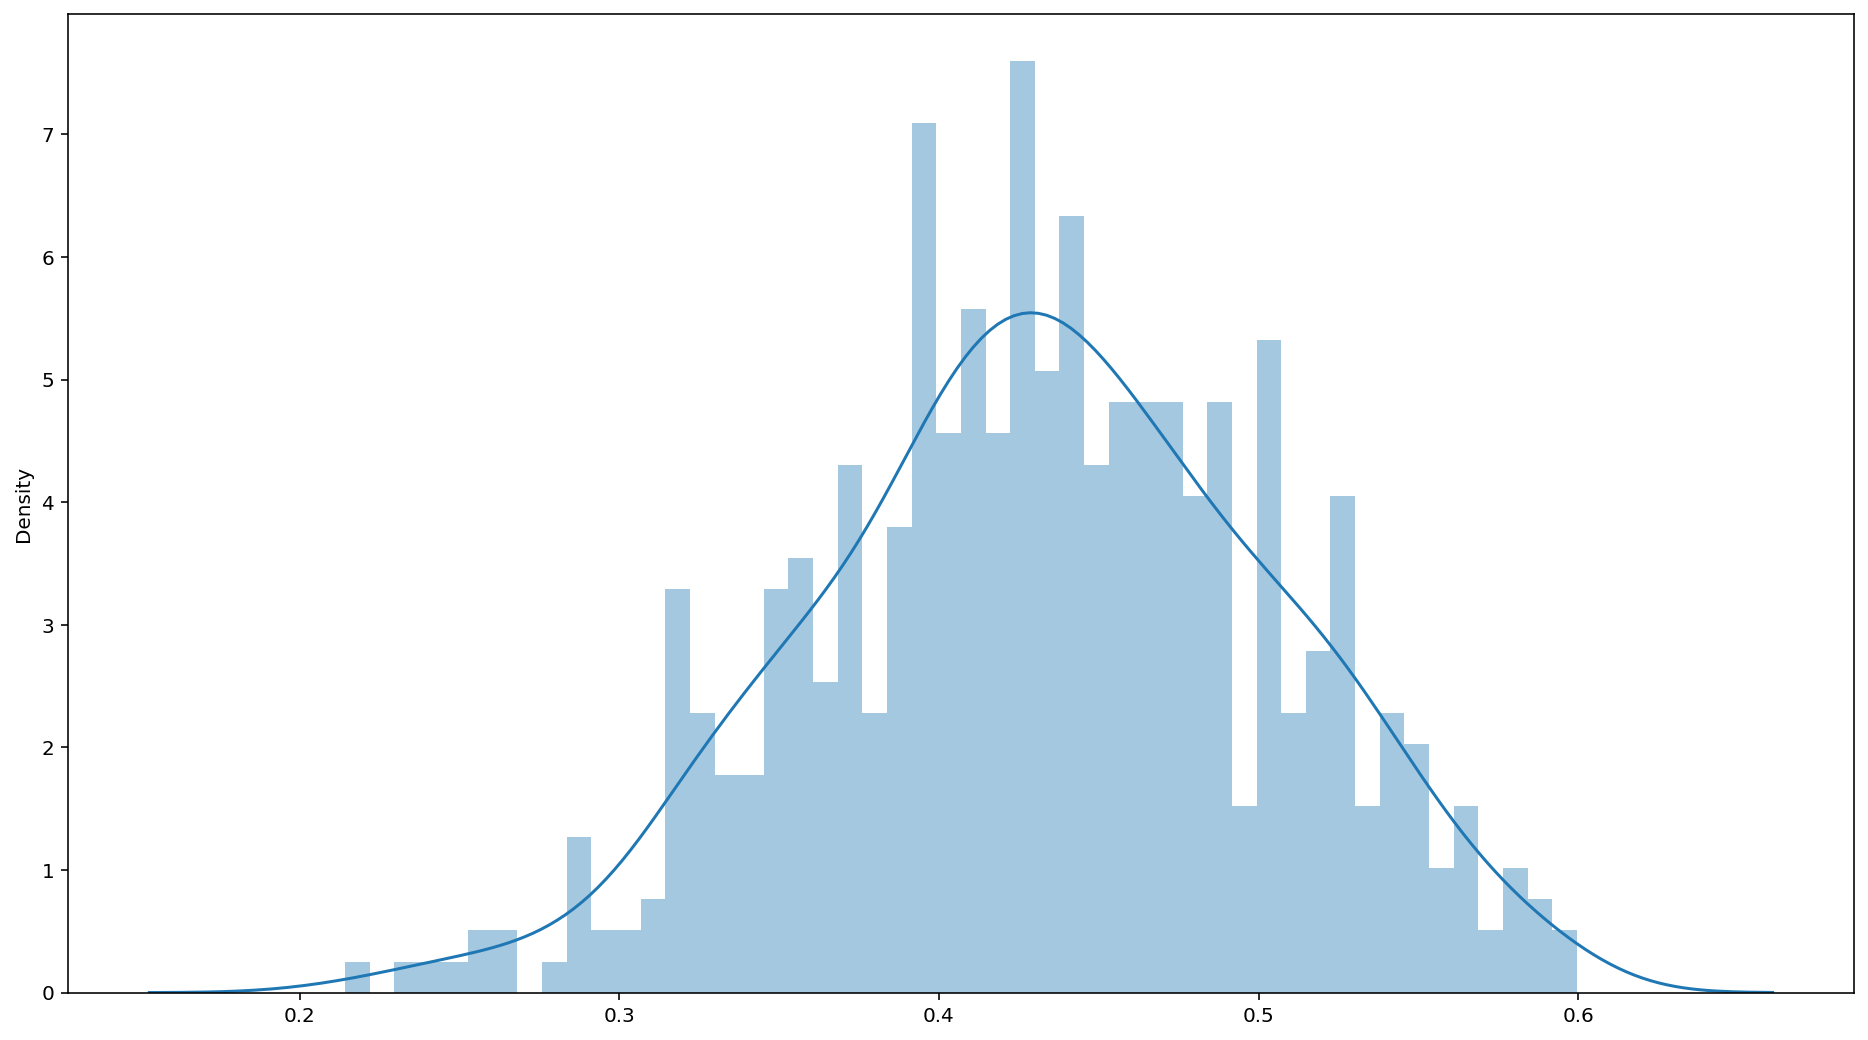

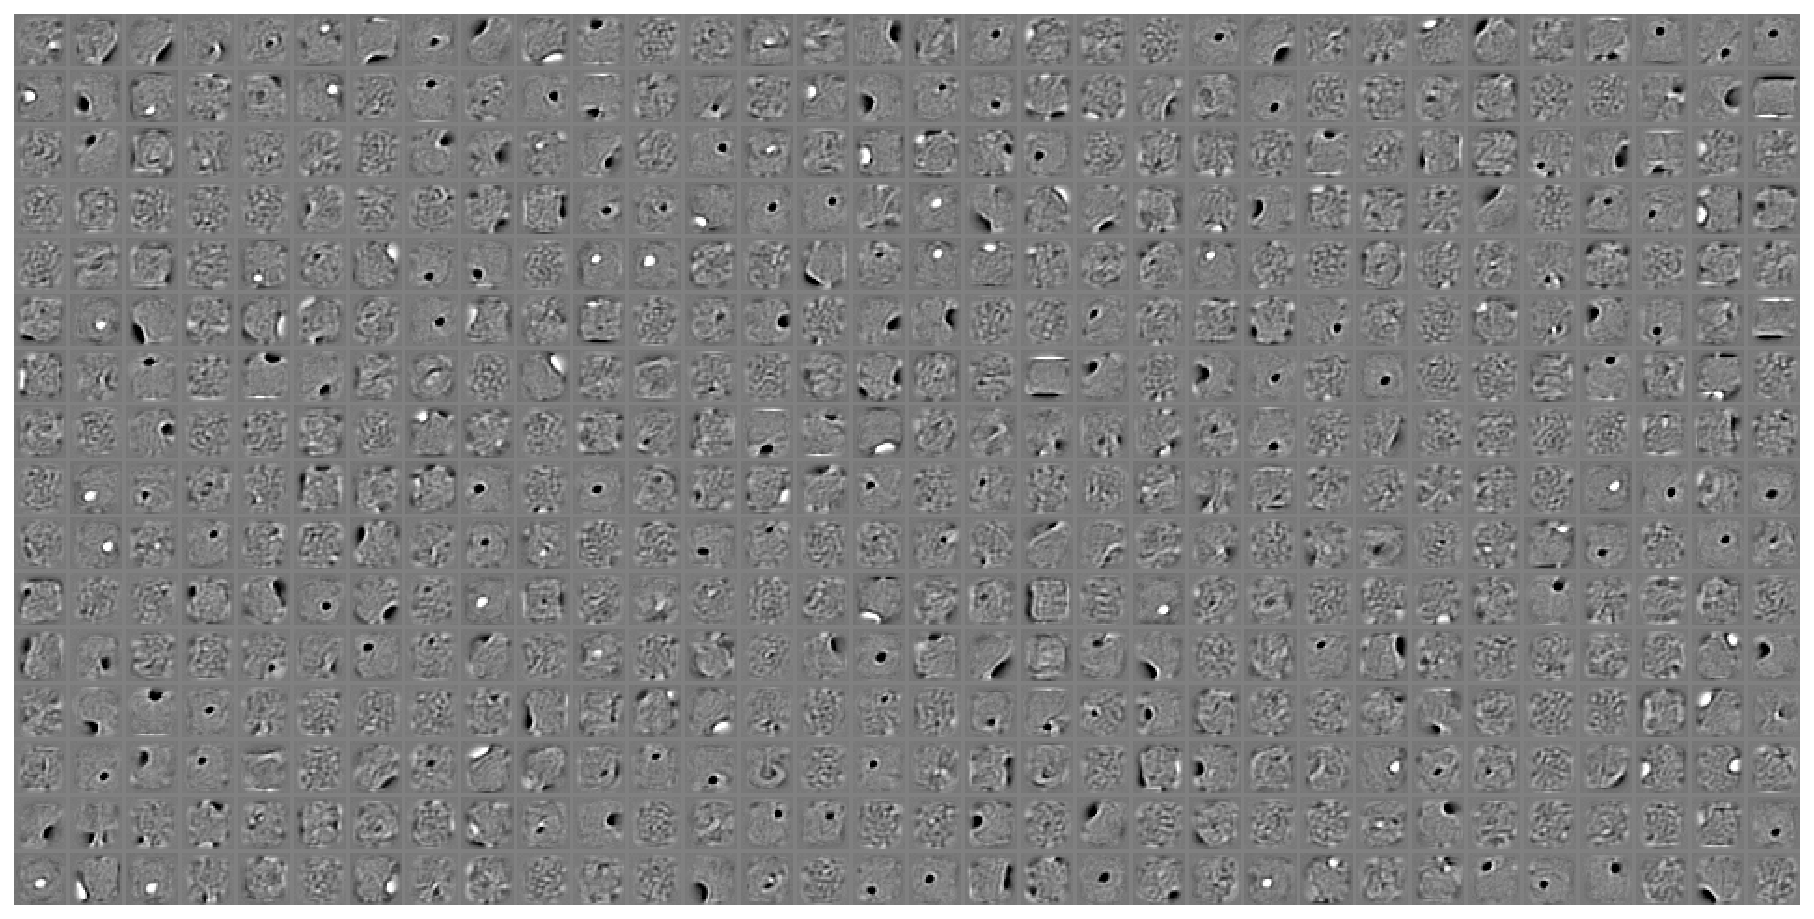

In [9]:
# Plotting mean hidden activations
activations = feed_forward(rbm.W, mnist_dataset, sigmoid)
mean_activations = np.mean(activations, 1)
sns.distplot(mean_activations, bins=50)

# Displaying RBM filetrs
filters = np.reshape(np.transpose(rbm.W)[:-1, :-1], newshape=(16, -1, 28, 28))
filters = np.clip(filters, -1.0, 1.0)

img = tiles(filters)
plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()